In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [6]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
      ])

In [8]:
batch_size = 24

trainset = torchvision.datasets.CIFAR100(root='data/', train=True,
                                        download=False, transform= train_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='data/', train=False,
                                       download=True, transform= test_transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 
           'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 
           'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 
           'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
           'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 
           'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 
           'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
           'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
           'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm')

Files already downloaded and verified


In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([24, 3, 32, 32])
torch.Size([24])
tensor([12, 82,  7, 97, 80, 57, 33, 37, 76, 68, 34, 13, 49, 57, 96, 86, 67, 82,
        20, 76, 33, 65, 55, 59])


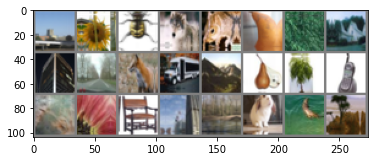

bridge sunflowers beetle  wolf squirrel pears flatfish hamster skyscraper  road forest   bus mountain pears willow telephone   ray sunflowers chair skyscraper flatfish rabbit otter  pine


In [13]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [14]:
# base method we provide:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 200)
        self.fc2 = nn.Linear(200, 128)
        self.fc3 = nn.Linear(128, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.le(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
# (Optional but highly recommended) TODO: You can define your own neural network to create a better performing model!
class MyOwnNet(nn.Module):
    def __init__(self):
        super(MyOwnNet, self).__init__()
        
        self.conv1=nn.Conv2d(3,32,5)
        self.conv1_bn=nn.BatchNorm2d(32)
        
        self.conv2=nn.Conv2d(32,32,5)
        self.conv2_bn=nn.BatchNorm2d(32)

        self.fc1 = nn.Linear(32 * 5* 5, 512)
        self.fc1_bn = nn.BatchNorm1d(512)
        
        self.pool=nn.AvgPool2d(2,2)
        #self.dropout25 = nn.Dropout2d(p=0.25)

        self.fc2 = nn.Linear(512, 256)
        self.fc2_bn = nn.BatchNorm1d(256)
        self.fc2_1 = nn.Linear(256, 256)

        self.fc3 = nn.Linear(256, 100)
        
    def forward(self,x):
        
        x=(self.pool(F.leaky_relu(self.conv1_bn(self.conv1(x)))))

        x=(self.pool(F.leaky_relu(self.conv2_bn(self.conv2(x)))))     

        x = x.reshape(-1, 32 * 5* 5)   
        
        x = F.leaky_relu(self.fc1_bn(self.fc1(x)))
        x = F.leaky_relu(self.fc2_bn(self.fc2(x)))
        x = F.leaky_relu(self.fc2_1(x))

        x = self.fc3(x)
        
        return x      

In [18]:
inzvaNet = MyOwnNet()

#inzvaNet.to(device)

inzvaNet.train()
# base optimizer with following parameters:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(inzvaNet.parameters(), lr=0.01)

In [20]:
# Training loop
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = inzvaNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 4.128
[2,  2000] loss: 3.814
[3,  2000] loss: 3.636
[4,  2000] loss: 3.509
[5,  2000] loss: 3.406
[6,  2000] loss: 3.321
[7,  2000] loss: 3.243
[8,  2000] loss: 3.166
[9,  2000] loss: 3.093
[10,  2000] loss: 3.031
[11,  2000] loss: 2.976
[12,  2000] loss: 2.934
[13,  2000] loss: 2.884
[14,  2000] loss: 2.849
[15,  2000] loss: 2.819
[16,  2000] loss: 2.783
[17,  2000] loss: 2.749
[18,  2000] loss: 2.733
[19,  2000] loss: 2.700
[20,  2000] loss: 2.683
[21,  2000] loss: 2.669
[22,  2000] loss: 2.637
[23,  2000] loss: 2.617
[24,  2000] loss: 2.596
[25,  2000] loss: 2.570
[26,  2000] loss: 2.551
[27,  2000] loss: 2.541
[28,  2000] loss: 2.526
[29,  2000] loss: 2.517
[30,  2000] loss: 2.502
[31,  2000] loss: 2.489
[32,  2000] loss: 2.472
[33,  2000] loss: 2.465
[34,  2000] loss: 2.444
[35,  2000] loss: 2.432
[36,  2000] loss: 2.414
[37,  2000] loss: 2.416
[38,  2000] loss: 2.410
[39,  2000] loss: 2.387
[40,  2000] loss: 2.389
[41,  2000] loss: 2.379
[42,  2000] loss: 2.355
[

In [22]:
# test on all test data
inzvaNet.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels=images, labels
        outputs = inzvaNet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

4393
10000
Accuracy of the network on the 10000 test images: 43 %


In [23]:
from torchvision import models

In [26]:
resnet50 = models.resnet50(pretrained=True)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
for param in list(resnet50.parameters())[:]:
    param.requires_grad = False

In [33]:
resnet50.fc = nn.Linear(2048, 100)

In [34]:
params_to_update = []
for name, param in resnet50.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)


optimizer = torch.optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()

In [35]:
train_loader = trainloader

In [36]:
valid_loader = testloader

In [37]:
num_epochs = 5
resnet50.train()

for epoch in range(num_epochs):  
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        running_right += (labels == torch.max(outputs, 1)[1]).sum()
        
        # выводим статистику о процессе обучения
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            resnet50.eval()
            
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}. ' \
                  f'Acc: {running_right / running_items:.3f}', end='. ')
            running_loss, running_items, running_right = 0.0, 0.0, 0.0

            test_running_right, test_running_total = 0.0, 0.0
            for i, data in enumerate(valid_loader):
            
                test_outputs = resnet50(data[0])
                test_running_total += len(data[1])
                test_running_right += (data[1] == torch.max(test_outputs, 1)[1]).sum()
            
            print(f'Test acc: {test_running_right / test_running_total:.3f}')

        resnet50.train()
        
print('Training is finished!')

Epoch [1/5]. Step [1/2084]. Loss: 0.198. Acc: 0.000. Test acc: 0.010
Epoch [1/5]. Step [301/2084]. Loss: 0.210. Acc: 0.036. Test acc: 0.059
Epoch [1/5]. Step [601/2084]. Loss: 0.198. Acc: 0.062. Test acc: 0.090
Epoch [1/5]. Step [901/2084]. Loss: 0.195. Acc: 0.064. Test acc: 0.095
Epoch [1/5]. Step [1201/2084]. Loss: 0.192. Acc: 0.079. Test acc: 0.113
Epoch [1/5]. Step [1501/2084]. Loss: 0.190. Acc: 0.082. Test acc: 0.119
Epoch [1/5]. Step [1801/2084]. Loss: 0.188. Acc: 0.090. Test acc: 0.113
Epoch [2/5]. Step [1/2084]. Loss: 0.193. Acc: 0.125. Test acc: 0.131
Epoch [2/5]. Step [301/2084]. Loss: 0.184. Acc: 0.102. Test acc: 0.140
Epoch [2/5]. Step [601/2084]. Loss: 0.185. Acc: 0.106. Test acc: 0.128
Epoch [2/5]. Step [901/2084]. Loss: 0.183. Acc: 0.108. Test acc: 0.142
Epoch [2/5]. Step [1201/2084]. Loss: 0.182. Acc: 0.115. Test acc: 0.148
Epoch [2/5]. Step [1501/2084]. Loss: 0.182. Acc: 0.108. Test acc: 0.150
Epoch [2/5]. Step [1801/2084]. Loss: 0.183. Acc: 0.108. Test acc: 0.140
Epoc